In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
df.shape

(2111, 17)

In [4]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [5]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [6]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f878cccb460>,
      dtype=object)

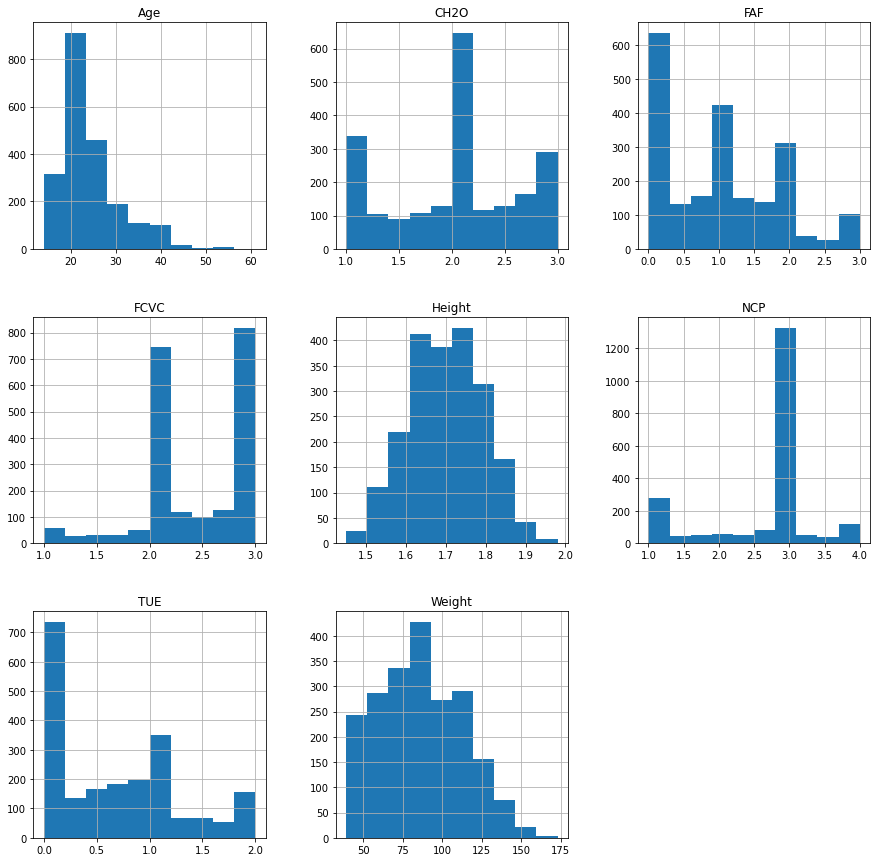

In [8]:
p = df.hist(figsize = (15,15))
p

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [10]:
df.isnull().any()

Gender                            False
Age                               False
Height                            False
Weight                            False
family_history_with_overweight    False
FAVC                              False
FCVC                              False
NCP                               False
CAEC                              False
SMOKE                             False
CH2O                              False
SCC                               False
FAF                               False
TUE                               False
CALC                              False
MTRANS                            False
NObeyesdad                        False
dtype: bool

In [11]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1=df.iloc[:,:]
categorical_feature_mask = df1.dtypes==object
categorical_cols = df1.columns[categorical_feature_mask].tolist()
df1[categorical_cols]=df1[categorical_cols].apply(lambda col:encoder.fit_transform(col))
df1

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


In [13]:
#df1 = pd.get_dummies(df, columns=['Gender', 'family_history_with_overweight',
 #      'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])

In [14]:
from sklearn.preprocessing import StandardScaler
standScaler = StandardScaler()
columns_to_scale = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df1[columns_to_scale] = standScaler.fit_transform(df1[columns_to_scale])

from scipy.stats import skew
print(skew(df1['MBI']))

In [16]:
from scipy import stats
z_scores = stats.zscore(df1)
abs_z_scores=np.abs(z_scores)
abandoned_entries=(abs_z_scores>=3).all(axis=1)
print(abandoned_entries)

[False False False ... False False False]


In [17]:
filtered_entries=(abs_z_scores<3).all(axis=1)
new_df=df1[filtered_entries]
print(new_df)

      Gender       Age    Height    Weight  family_history_with_overweight  \
0          0 -0.522124 -0.875589 -0.862558                               1   
2          1 -0.206889  1.054029 -0.366090                               1   
3          1  0.423582  1.054029  0.015808                               0   
4          1 -0.364507  0.839627  0.122740                               0   
5          1  0.738817 -0.875589 -1.282647                               0   
...      ...       ...       ...       ...                             ...   
2106       0 -0.525774  0.097045  1.711763                               1   
2107       0 -0.367195  0.502844  1.800914                               1   
2108       0 -0.281909  0.541672  1.798868                               1   
2109       0  0.007776  0.404927  1.785780                               1   
2110       0 -0.102119  0.398344  1.790592                               1   

      FAVC      FCVC       NCP  CAEC  SMOKE      CH2O  SCC     

DF2 - only for pictures

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2=df
le.fit(df2['NObeyesdad'])
df2['NObeyesdad']=le.transform(df2['NObeyesdad'])
df2

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,2,0,-0.013073,0,-1.188039,0.561997,3,3,1
1,0,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,2,1,1.618759,1,2.339750,-1.080625,2,3,1
2,1,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,2,0,-0.013073,0,1.163820,0.561997,1,3,1
3,1,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,2,0,-0.013073,0,1.163820,-1.080625,1,4,5
4,1,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,2,0,-0.013073,0,-1.188039,-1.080625,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,-0.525774,0.097045,1.711763,1,1,1.088342,0.404153,2,0,-0.456705,0,0.783135,0.407996,2,3,4
2107,0,-0.367195,0.502844,1.800914,1,1,1.088342,0.404153,2,0,-0.004702,0,0.389341,-0.096251,2,3,4
2108,0,-0.281909,0.541672,1.798868,1,1,1.088342,0.404153,2,0,0.075361,0,0.474971,-0.019018,2,3,4
2109,0,0.007776,0.404927,1.785780,1,1,1.088342,0.404153,2,0,1.377801,0,0.151471,-0.117991,2,3,4


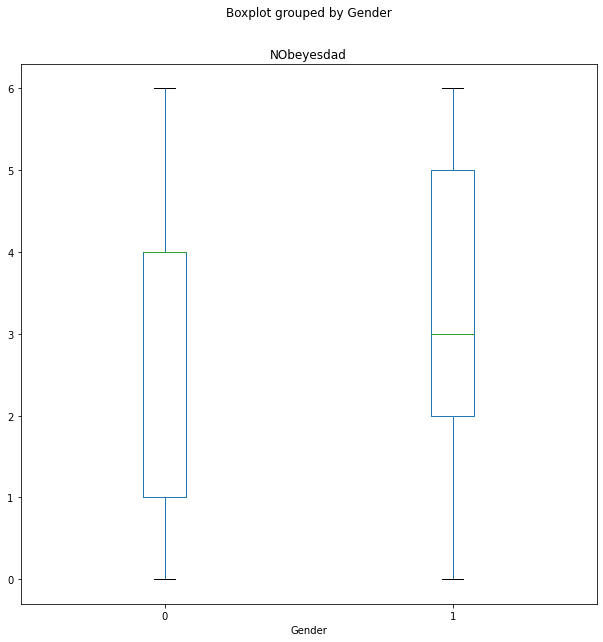

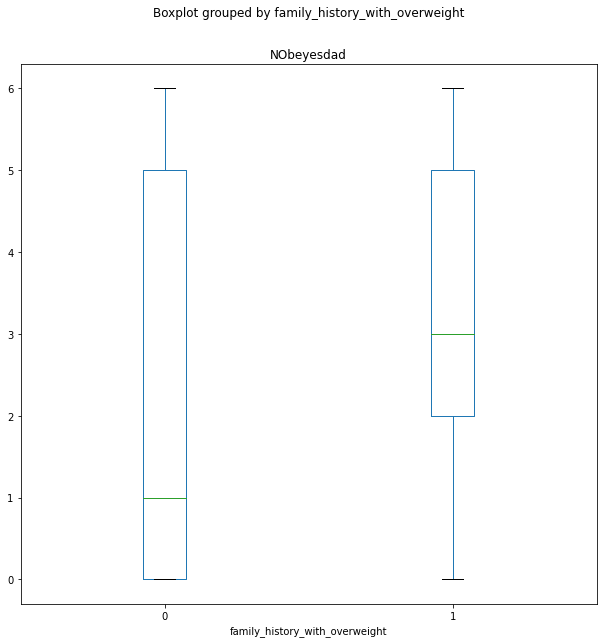

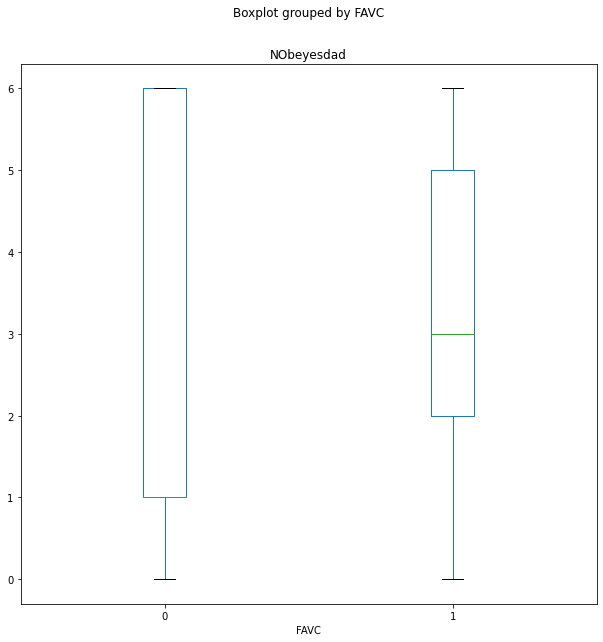

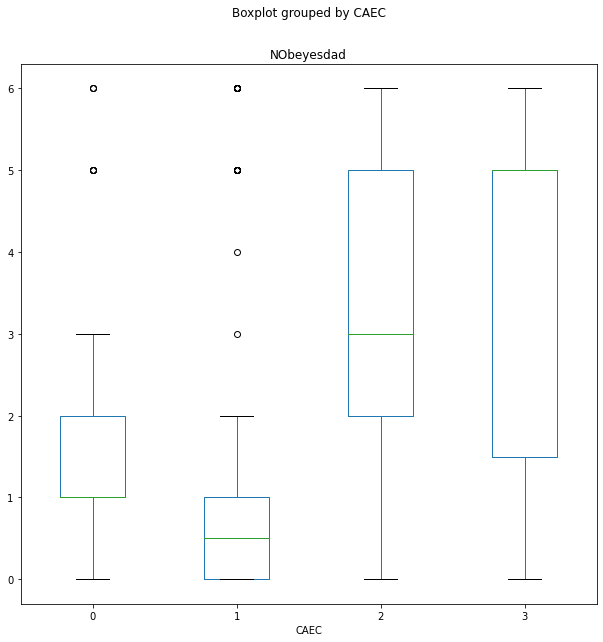

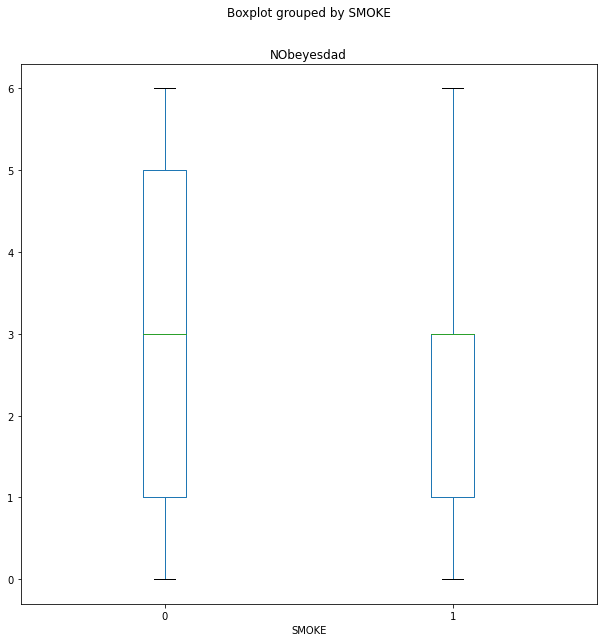

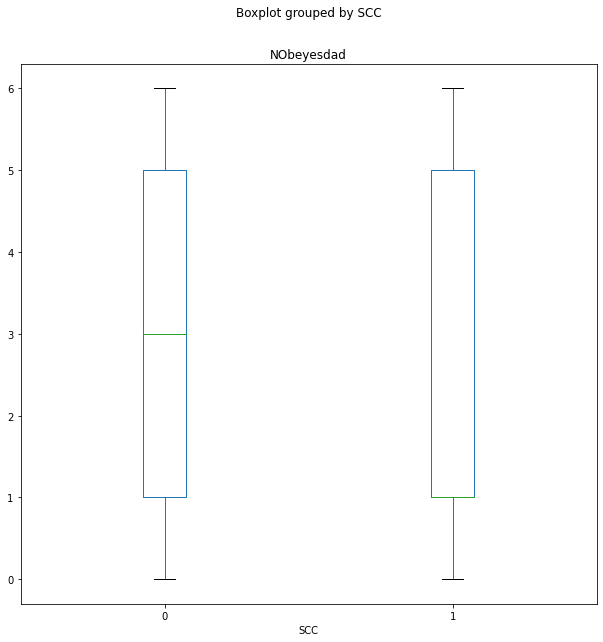

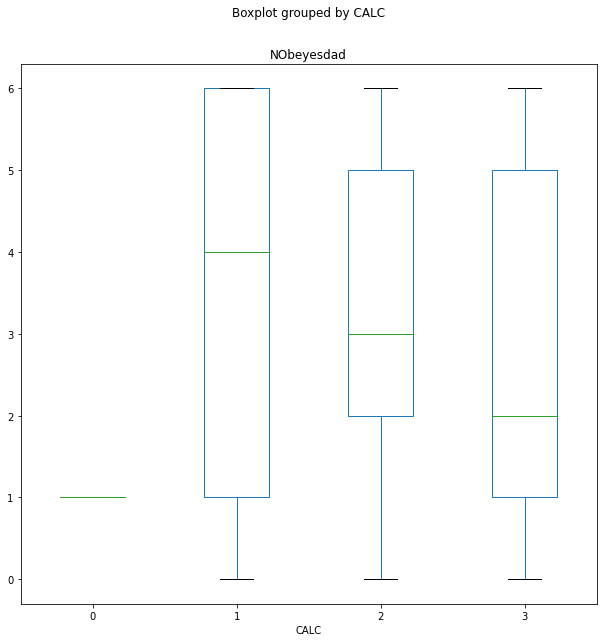

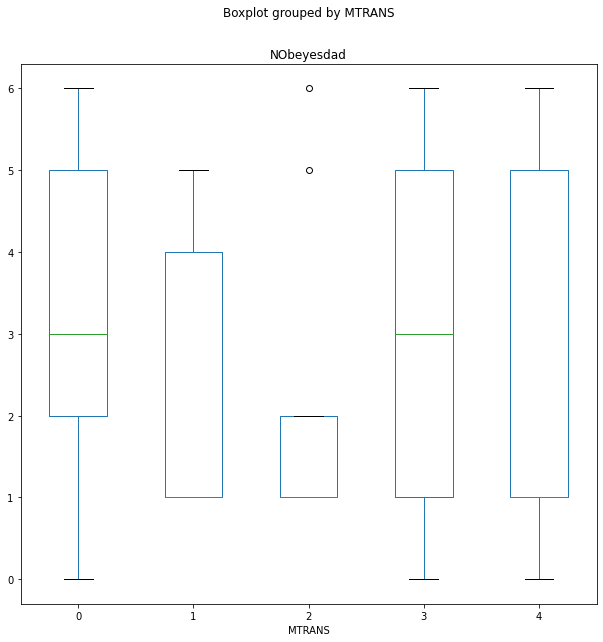

In [19]:
df2.boxplot(by ='Gender',column=['NObeyesdad'],grid = False,figsize=(10,10)) 
df2.boxplot(by ='family_history_with_overweight',column=['NObeyesdad'],grid = False,figsize=(10,10)) 
df2.boxplot(by ='FAVC',column=['NObeyesdad'],grid = False,figsize=(10,10)) 
df2.boxplot(by ='CAEC',column=['NObeyesdad'],grid = False,figsize=(10,10)) 
df2.boxplot(by ='SMOKE',column=['NObeyesdad'],grid = False,figsize=(10,10)) 
df2.boxplot(by ='SCC',column=['NObeyesdad'],grid = False,figsize=(10,10)) 
df2.boxplot(by ='CALC',column=['NObeyesdad'],grid = False,figsize=(10,10)) 
df2.boxplot(by ='MTRANS',column=['NObeyesdad'],grid = False,figsize=(10,10)) 

PCA - not used

In [20]:
from sklearn.decomposition import PCA as sklearnPCA
x_num=['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
x_fitpca=df1[x_num]
sklearn_pca = sklearnPCA(n_components=1)
Y_sklearn = sklearn_pca.fit_transform(x_fitpca)
print(Y_sklearn)
Y_sklearn.shape
per_var = np.round(sklearn_pca.explained_variance_ratio_*100,decimals=1)
print(per_var)

[[ 1.33302924]
 [ 0.08772761]
 [-0.82897952]
 ...
 [-1.72003765]
 [-2.02948152]
 [-1.99467278]]
[22.6]


In [22]:
x

array([[-0.52212439, -0.87558934, -0.86255819, ...,  0.56199675,
         3.        ,  3.        ],
       [-0.52212439, -1.94759928, -1.16807699, ..., -1.08062463,
         2.        ,  3.        ],
       [-0.20688898,  1.05402854, -0.36609013, ...,  0.56199675,
         1.        ,  3.        ],
       ...,
       [-0.28190933,  0.54167211,  1.79886776, ..., -0.01901815,
         2.        ,  3.        ],
       [ 0.00777624,  0.40492652,  1.78577968, ..., -0.11799101,
         2.        ,  3.        ],
       [-0.10211908,  0.39834438,  1.7905916 , ...,  0.09243207,
         2.        ,  3.        ]])

In [21]:
#x = df1.drop('NObeyesdad', axis=1)
#x = x.drop('MBI', axis=1)
#y = df1['MBI']
x=df1.loc[:,'Age':'MTRANS'].to_numpy()
y=df1['MBI'].to_numpy()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x

KeyError: 'MBI'

 Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(x_train,y_train)
k=lin_reg_mod.fit(x,y)
pred_train=lin_reg_mod.predict(x_train)
train_set_rmse=(np.sqrt(mean_squared_error(y_train,pred_train)))
train_set_r2=r2_score(y_train,pred_train)
pred_test=lin_reg_mod.predict(x_test)
test_set_rmse=(np.sqrt(mean_squared_error(y_test,pred_test)))
test_set_r2=r2_score(y_test,pred_test)

importance = k.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_train,pred_train)

In [ ]:
plt.plot(y_test,pred_test)

In [ ]:
print(train_set_rmse)
print(train_set_r2)
print(test_set_rmse) #Lower the value is, the better the fit
print(test_set_r2) #The closer towards 1, the better the fit

Lasso Regression

In [ ]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha=0.1)
reg_lasso.fit([[0,0],[1,1]],[0,1])

In [ ]:
reg_lasso.predict([[1,1]])

In [ ]:
model_lasso=linear_model.Lasso(alpha=0.1)
model_lasso.fit(x_train,y_train)
pred_train_lasso=model_lasso.predict(x_train)
pred_test_lasso=model_lasso.predict(x_test)

In [ ]:
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train,pred_train_lasso))
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print(r2_score(y_test,pred_test_lasso))

In [ ]:
plt.plot(y_train,pred_train_lasso)

In [ ]:
plt.plot(y_test,pred_test_lasso)

Elastic Net

In [ ]:
model_enet=linear_model.ElasticNet(alpha=0.01)
model_enet.fit(x_train,y_train)
pred_train_enet=model_enet.predict(x_train)
pred_test_enet=model_enet.predict(x_test)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train,pred_train_enet))
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test,pred_test_enet))

In [ ]:
plt.plot(y_train,pred_train_enet)

In [ ]:
plt.plot(y_test,pred_test_enet)

Ridge Regression

In [ ]:
rr=linear_model.Ridge(alpha=0.01)
q=rr.fit(x_train,y_train)
pred_train_rr=rr.predict(x_train)
pred_test_rr=rr.predict(x_test)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train,pred_train_rr))
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test,pred_test_rr))

importance = q.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

In [ ]:
plt.plot(y_train,pred_train_rr)

In [ ]:
plt.plot(y_test,pred_test_rr)